# **Analyses de faisabilité des images**

Dans cette section, nous allons élaborer l'étude de faisabilité de nos images en utilisant deux méthodes d'analyse distinctes :

**Analyse des images avec des descripteurs (algorithme SIFT)**
Nous utiliserons l'algorithme SIFT (Scale-Invariant Feature Transform) pour extraire des descripteurs d'images. Cet algorithme nous permettra d'identifier des points d'intérêt et d'extraire des caractéristiques visuelles invariantes qui faciliteront la reconnaissance et la comparaison d'images.

**Algorithme de type CNN avec Apprentissage par Transfert (Transfer Learning)**
Nous mettonstrons en œuvre une méthode de type Convolutional Neural Network (CNN) en appliquant la technique de transfert d'apprentissage. Cette approche consiste à utiliser un modèle pré-entraîné sur une vaste base de données d'images, puis à l'adapter à notre propre ensemble de données. Cela nous permettra d'atteindre une meilleure précision dans la classification et l'analyse des images sans devoir entraîner un modèle à partir de zéro.

**Import des librairies**

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MiniBatchKMeans

In [ ]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [ ]:
#chargement fichier pretraiter
data_texte = pd.read_csv('data_texte_cleaned.csv')

In [ ]:
# chargement fichier avec les categorie
data_texte = pd.read_csv('data_texte_with_categories.csv')

In [ ]:
# chargement fichier avec les categorie
data_texte = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [ ]:
data_texte[['Category_1', 'Category_2', 'Category_3']] = data_texte['product_category_tree'].str.strip('[]').str.replace('"', '').str.split('>>', n=3, expand=True)[[0, 1, 2]]

**Importer les bibliothèques nécessaires**

In [ ]:
from google.colab import drive
from PIL import Image
import os
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import cv2
import time
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Monter Google Drive
drive.mount('/content/drive')

# Spécifiez le chemin correct vers votre dossier d'images
file_path = '/content/drive/My Drive/image'

# Lister les fichiers dans le dossier
list_photos = [file for file in os.listdir(file_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Afficher le nombre d'images
print(f'Nombre d\'images: {len(list_photos)}')

# Afficher la liste des images (facultatif)
print(list_photos)


Mounted at /content/drive
Nombre d'images: 1050
['2d4f1232af970bd19881ceacad6ccfe3.jpg', '2cc24452688ed35dfbff566e22e53c95.jpg', '2e3586dc60df258c5478446d65a317d2.jpg', '2e474c49a7dfe704c35cf3990740daa3.jpg', '2eb07dc77e2fc7e3668fd7ed9b864039.jpg', '3a7b224bf1bc9cee9052f9c9df0355f6.jpg', '2f40e01331bc00216d147d4ebfdfbaf3.jpg', '2ede595489db33a036d135ce22645515.jpg', '2f756aa2ceb1efda609c428a47308758.jpg', '3adb36e4275733d0d113d9039e6814ea.jpg', '2f712e172ee77a913b6d627657986b72.jpg', '3b0f02b3acf1825f8bbc1fb3b860dbb8.jpg', '3aaa50eb5d2cf4c18b57346423871624.jpg', '3c4604dba348a99a2dfbbc2cd3928101.jpg', '3bc98543c7dd0d8fce5b8185b4a58c43.jpg', '3ccceaae844f34180708cb6cba3441bf.jpg', '3ba13df7877fd979d64c87c7586a5ca6.jpg', '3b80ac036843b278083fabfd9a3c84ff.jpg', '3b96a152c8fac4421fb67b6190584976.jpg', '3bf09b28e3bf526c2dfebfe591921103.jpg', '3b465b02720ef7c930cb2e065a8fc05d.jpg', '3c4ca34c50a5437a1bcc42b72fc1351f.jpg', '3c74db45cbfc14a78b8466dca494b3bb.jpg', '3f9f12fa8fc6d7ebef136040f179a2

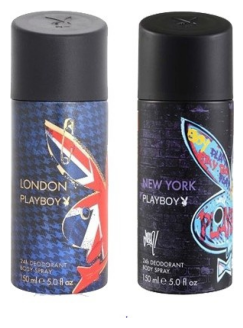

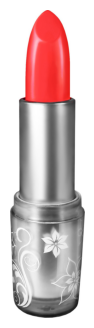

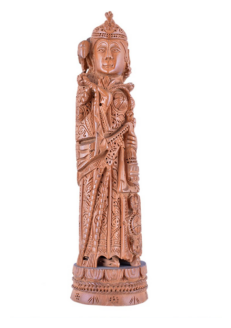

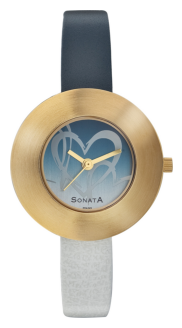

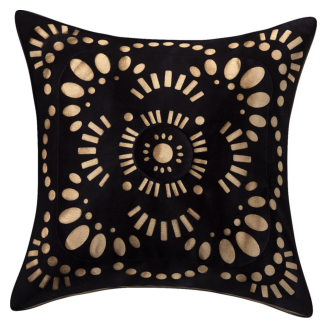

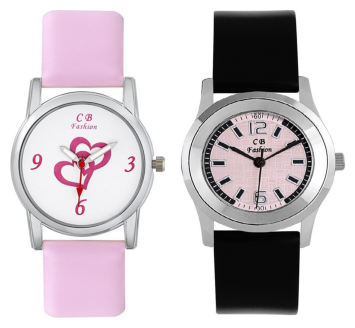

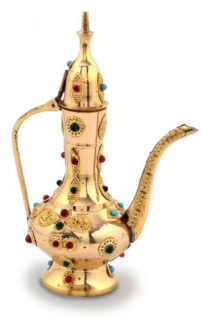

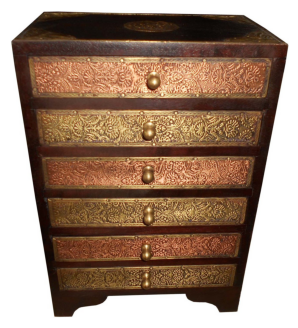

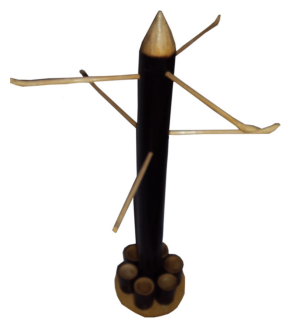

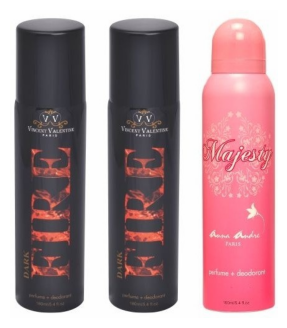

In [ ]:
# Afficher seulement les 10 premières images
for image_file in list_photos[:10]:
    # Charger l'image avec PIL
    img = Image.open(os.path.join(file_path, image_file))

    # Afficher l'image avec matplotlib
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')  # Cacher les axes
    plt.show()

**Examiner les différentes images à l'aide de diverses méthodes de transformation**

Cela inclut des étapes telles que le passage en niveau 2, la conversion en niveaux de gris, le filtrage du bruit, et l'ajustement du contraste, etc.

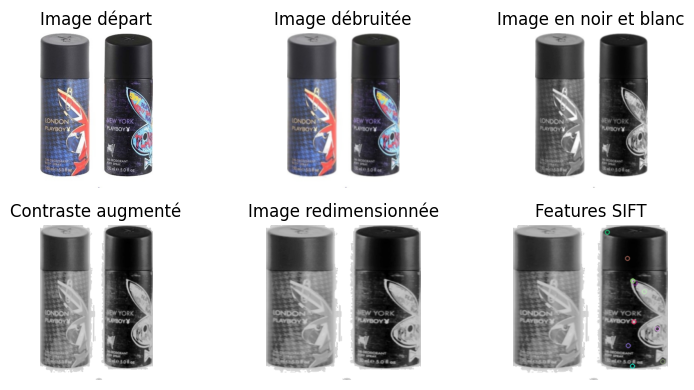

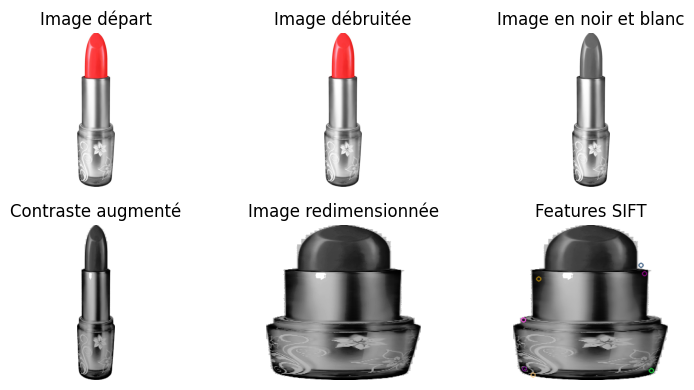

In [ ]:
# Créer l'objet SIFT
sift = cv2.SIFT_create(10)

# Afficher seulement les 2 premières images avec traitement OpenCV
for image_file in list_photos[:2]:
    img_path = os.path.join(file_path, image_file)

    # Charger l'image avec OpenCV (cv2.imread) pour utiliser les méthodes de traitement
    image = cv2.imread(img_path)

    # Ajuster la taille de la figure pour toutes les images
    plt.figure(figsize=(8, 4))  # Taille de figure réduite

    # 1. Image originale
    plt.subplot(2, 3, 1)
    plt.axis('off')
    plt.title('Image départ')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir BGR en RGB pour affichage correct

    # 2. Enlever le bruit avec un filtre gaussien
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    plt.subplot(2, 3, 2)
    plt.axis('off')
    plt.title('Image débruitée')
    plt.imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))

    # 3. Conversion en noir et blanc
    gray_img = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
    plt.subplot(2, 3, 3)
    plt.axis('off')
    plt.title('Image en noir et blanc')
    plt.imshow(gray_img, cmap='gray')

    # 4. Augmentation du contraste avec l'égalisation d'histogramme
    image_equalized = cv2.equalizeHist(gray_img)
    plt.subplot(2, 3, 4)
    plt.axis('off')
    plt.title('Contraste augmenté')
    plt.imshow(image_equalized, cmap='gray')

    # 5. Redimensionner l'image
    dsize = (224, 224)
    image_resized = cv2.resize(image_equalized, dsize)
    plt.subplot(2, 3, 5)
    plt.axis('off')
    plt.title('Image redimensionnée')
    plt.imshow(image_resized, cmap='gray')

    # 6. Détection des features SIFT
    kp, des = sift.detectAndCompute(image_resized, None)
    img_with_keypoints = cv2.drawKeypoints(image_resized, kp, None)
    plt.subplot(2, 3, 6)
    plt.axis('off')
    plt.title('Features SIFT')
    plt.imshow(img_with_keypoints, cmap='gray')

    # Afficher le tout
    plt.tight_layout()  # Ajuste les sous-graphique pour éviter le chevauchement
    plt.show()

## **Algorithme SIFT (Scale-Invariant Feature Transform)**

Nous allons charger toutes les images d'un dossier et les convertir en tableaux (matrices) en niveaux de gris, car l'algorithme SIFT fonctionne exclusivement sur des images monochromes. Ensuite, nous extrairons les caractéristiques SIFT, qui se manifestent sous forme de petits cercles, arcs de cercle, et autres formes similaires sur chaque image. Comme le nombre de ces caractéristiques est élevé, nous les regrouperons à l'aide de la méthode KMeans, permettant ainsi une meilleure gestion et analyse des données.

*Détermination et affichage des descripteurs SIFT*

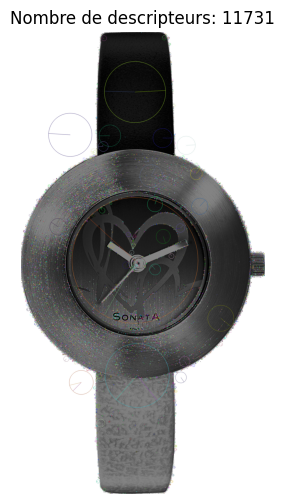

Le nombre de descripteurs pour cette image est de : 11731
La forme des descripteurs est : (11731, 128)
Délai de traitement SIFT : 7.481246 secondes


In [ ]:
# Spécifiez le chemin de l'image
image_path = '/content/drive/My Drive/image/2e474c49a7dfe704c35cf3990740daa3.jpg'

# Charger l'image en niveaux de gris
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer l'égalisation d'histogramme pour améliorer le contraste
image = cv2.equalizeHist(image)

# Créer l'objet SIFT
sift = cv2.SIFT_create()

# Mesurer le temps de traitement SIFT
start_time = time.time()  # Temps de début

# Détecter les points clés et descripteurs SIFT
keypoints, descriptors = sift.detectAndCompute(image, None)

# Mesurer le temps écoulé
end_time = time.time()  # Temps de fin
processing_time = end_time - start_time  # Délai de traitement

# Dessiner les points clés sur l'image
img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Afficher l'image avec les points clés
plt.figure(figsize=(10, 6))
plt.imshow(img_with_keypoints, cmap='gray')
plt.title(f"Nombre de descripteurs: {descriptors.shape[0]}")
plt.axis('off')  # Cacher les axes
plt.show()

# Afficher le nombre de descripteurs et le délai de traitement
print(f"Le nombre de descripteurs pour cette image est de : {descriptors.shape[0]}")
print(f"La forme des descripteurs est : {descriptors.shape}")
print(f"Délai de traitement SIFT : {processing_time:.6f} secondes")

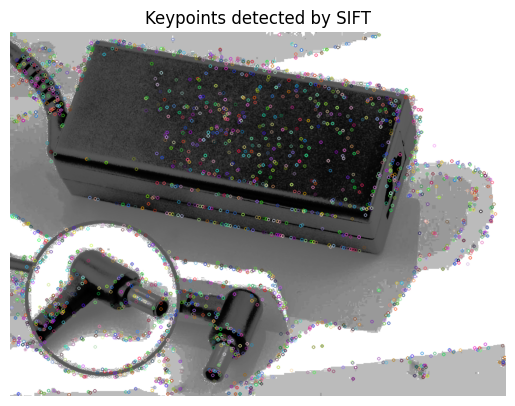

Descripteurs :  (2358, 128)

[[  0.   0.   0. ...  39.   3.   1.]
 [  1.   0.   0. ...   0.   2.   8.]
 [ 74.  10.   1. ...   0.   0.   0.]
 ...
 [  0.   0.  56. ...   0.  41. 129.]
 [ 15. 137.   0. ...   3.   0.   2.]
 [133. 111.   4. ...   0.   0.   0.]]


In [ ]:
# Charger l'image en niveaux de gris
image_path = os.path.join(file_path, list_photos[15])  # Utilisez la deuxième image de la liste
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convertir en niveaux de gris

# Égaliser l'histogramme de l'image
image = cv2.equalizeHist(image)

# Créer un détecteur SIFT
sift = cv2.SIFT_create()

# Détecter les points clés et calculer les descripteurs
kp, des = sift.detectAndCompute(image, None)

# Dessiner les points clés sur l'image
img_with_kp = cv2.drawKeypoints(image, kp, None)

# Afficher l'image avec les points clés
plt.imshow(img_with_kp, cmap='gray')
plt.title('Keypoints detected by SIFT')
plt.axis('off')  # Ne pas afficher les axes
plt.show()

# Afficher les descripteurs
print("Descripteurs : ", des.shape)
print()
print(des)

In [ ]:
# Fonction pour charger les images dans un dossier
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        try:
           img_path = os.path.join(folder, filename)
           img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # SIFT fonctionne en niveau de gris
           if img is not None:
             images.append(img)
        except:
          print(filename)
    return images

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Charger seulement les 10 premières images pour éviter de surcharger la mémoire
images = load_images_from_folder(file_path)[:300]

# Créer un objet SIFT avec un nombre limité de caractéristiques
sift = cv2.SIFT_create(nfeatures=100)

# Fonction pour extraire les descripteurs SIFT
def extract_sift_features(images):
    all_descriptors = []
    for img in images:
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            all_descriptors.append(descriptors)

    return all_descriptors

In [ ]:
# Extraire les descripteurs SIFT pour toutes les images
sift_descriptors = extract_sift_features(images)

In [ ]:
# Combiner tous les descripteurs SIFT en une seule matrice
sift_descriptors_combined = np.vstack(sift_descriptors)

# Appliquer k-means pour regrouper les descripteurs en "visuel words"
from sklearn.cluster import KMeans

In [ ]:
# ici

In [ ]:
# Définir le nombre de clusters (nombre de mots visuels)
num_clusters = 200
kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(sift_descriptors_combined)

MiniBatchKMeans(n_clusters=200, random_state=0)

In [ ]:
def image_to_bow(descriptors, kmeans):
    # Attribuer les descripteurs SIFT de l'image à des clusters
    clusters = kmeans.predict(descriptors)
    # Créer un histogramme des "mots visuels"
    histogram, _ = np.histogram(clusters, bins=np.arange(0, num_clusters + 1))
    return histogram

# Convertir toutes les images en représentations BoVW
bovw_representations = []
for descriptors in sift_descriptors:
    if descriptors is not None:
        bovw_histogram = image_to_bow(descriptors, kmeans)
        bovw_representations.append(bovw_histogram)

bovw_representations = np.array(bovw_representations)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Créer un DataFrame pour les BoVW et les noms de fichiers
bovw_df = pd.DataFrame(bovw_representations)
bovw_df['image'] = list_photos[:len(bovw_representations)]  # Utiliser les noms d'image

# Fusionner avec les catégories dans data_texte
data_bovw = pd.merge(data_texte[['uniq_id', 'image', 'Category_1']], bovw_df, on='image', how='inner')

# Encoder les catégories
labelencoder = LabelEncoder()
data_bovw['category_encoded'] = labelencoder.fit_transform(data_bovw['Category_1'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


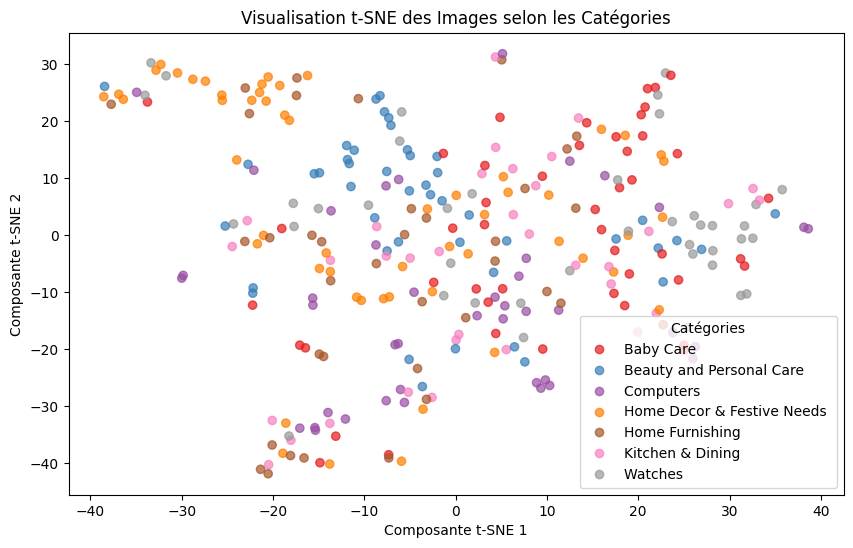

In [ ]:
# Convertir tous les noms de colonnes en chaînes de caractères
data_bovw.columns = data_bovw.columns.astype(str)

# Initialiser t-SNE avec une perplexité réduite, par exemple 10
tsne = TSNE(n_components=2, n_iter=2000, init='random', random_state=42, perplexity=10)

# Appliquer t-SNE uniquement aux colonnes BoVW (numériques) en excluant les colonnes de type string
X_tsne = tsne.fit_transform(data_bovw.iloc[:, 1:-2].select_dtypes(include=[np.number]))

# Afficher le résultat
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_bovw['category_encoded'], cmap='Set1', alpha=0.7)

# Légende et affichage
handles, labels = scatter.legend_elements()
plt.legend(handles, labelencoder.classes_, title="Catégories")
plt.title("Visualisation t-SNE des Images selon les Catégories")
plt.xlabel("Composante t-SNE 1")
plt.ylabel("Composante t-SNE 2")
plt.show()

*Bien que SIFT soit un algorithme puissant pour l'extraction de caractéristiques, les résultats montrent que la représentation visuelle obtenue par t-SNE indique un chevauchement important entre les clusters. Cela pourrait signifier que les descripteurs SIFT ne sont pas suffisants pour distinguer efficacement les caractéristiques des différentes classes d’objets dans ce jeu de données particulier.*

**ORB (Oriented FAST and Rotated BRIEF)**

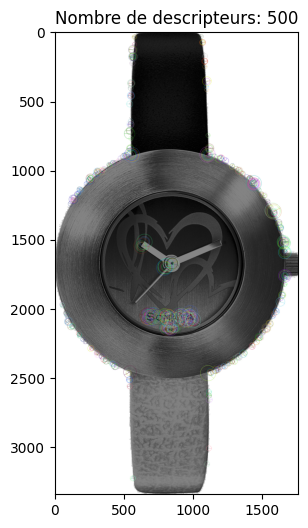

Le nombre de descripteurs pour cette image est de : 500
La forme des descripteurs est : (500, 32)


In [ ]:

# Spécifiez le chemin de l'image
image_path = '/content/drive/My Drive/image/2e474c49a7dfe704c35cf3990740daa3.jpg'

# Charger l'image en niveaux de gris
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Appliquer l'égalisation d'histogramme pour améliorer le contraste
image = cv2.equalizeHist(image)

# Créer l'objet ORB
orb = cv2.ORB_create()

# Détecter les points clés et descripteurs ORB
keypoints, descriptors = orb.detectAndCompute(image, None)

# Dessiner les points clés sur l'image
img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Afficher l'image avec les points clés
plt.figure(figsize=(10, 6))
plt.imshow(img_with_keypoints, cmap='gray')
plt.title(f"Nombre de descripteurs: {descriptors.shape[0]}")
plt.show()

# Afficher le nombre de descripteurs
print(f"Le nombre de descripteurs pour cette image est de : {descriptors.shape[0]}")
print(f"La forme des descripteurs est : {descriptors.shape}")

In [ ]:

# Fonction pour charger les images en niveaux de gris
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append((filename, img))  # Inclure le nom pour référence
    return images

# Charger les images
folder_path = '/content/drive/My Drive/image'
images = load_images_from_folder(folder_path)

# Initialiser ORB
orb = cv2.ORB_create()

# Fonction pour extraire les descripteurs ORB
def extract_orb_features(images):
    descriptors_list = []
    image_names = []
    for filename, img in images:
        keypoints, descriptors = orb.detectAndCompute(img, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)
            image_names.append(filename)
    return descriptors_list, image_names

# Extraire les descripteurs ORB et noms des images
orb_descriptors, image_names = extract_orb_features(images)

# Combiner tous les descripteurs en une seule matrice pour KMeans
orb_descriptors_combined = np.vstack(orb_descriptors)

# Appliquer KMeans pour créer les "visuel words" (mots visuels)
num_clusters = 100  # Adapter selon le dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(orb_descriptors_combined)

# Fonction pour convertir descripteurs ORB en histogrammes BoVW
def image_to_bow(descriptors, kmeans, num_clusters):
    clusters = kmeans.predict(descriptors)
    histogram, _ = np.histogram(clusters, bins=np.arange(num_clusters + 1))
    return histogram

# Créer les représentations BoVW pour chaque image
bovw_representations = []
for descriptors in orb_descriptors:
    bovw_histogram = image_to_bow(descriptors, kmeans, num_clusters)
    bovw_representations.append(bovw_histogram)

# Créer un DataFrame BoVW
bovw_df = pd.DataFrame(bovw_representations)

## **Algorithme de type CNN Transfer Learning**

L'apprentissage par transfert avec les réseaux de neurones convolutionnels (CNN) est une méthode populaire dans le domaine de l'apprentissage automatique, surtout pour la reconnaissance d'images.

Il existe plusieurs architectures CNN populaires comme VGG16, ResNet, Inception, et MobileNet.

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Monter Google Drive
drive.mount('/content/drive')

# Spécifiez le chemin correct vers votre dossier d'images
file_path = '/content/drive/My Drive/image'

# Lister les fichiers dans le dossier
list_photos = [file for file in os.listdir(file_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Afficher le nombre d'images
print(f'Nombre d\'images: {len(list_photos)}')

# Afficher la liste des images (facultatif)
print(list_photos)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Nombre d'images: 1050
['2d4f1232af970bd19881ceacad6ccfe3.jpg', '2cc24452688ed35dfbff566e22e53c95.jpg', '2e3586dc60df258c5478446d65a317d2.jpg', '2e474c49a7dfe704c35cf3990740daa3.jpg', '2eb07dc77e2fc7e3668fd7ed9b864039.jpg', '3a7b224bf1bc9cee9052f9c9df0355f6.jpg', '2f40e01331bc00216d147d4ebfdfbaf3.jpg', '2ede595489db33a036d135ce22645515.jpg', '2f756aa2ceb1efda609c428a47308758.jpg', '3adb36e4275733d0d113d9039e6814ea.jpg', '2f712e172ee77a913b6d627657986b72.jpg', '3b0f02b3acf1825f8bbc1fb3b860dbb8.jpg', '3aaa50eb5d2cf4c18b57346423871624.jpg', '3c4604dba348a99a2dfbbc2cd3928101.jpg', '3bc98543c7dd0d8fce5b8185b4a58c43.jpg', '3ccceaae844f34180708cb6cba3441bf.jpg', '3ba13df7877fd979d64c87c7586a5ca6.jpg', '3b80ac036843b278083fabfd9a3c84ff.jpg', '3b96a152c8fac4421fb67b6190584976.jpg', '3bf09b28e3bf526c2dfebfe591921103.jpg', '3b465b02720ef7c930cb2e065a8fc05d.jpg', '3c4ca34

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input


# Initialiser une liste pour stocker les caractéristiques d'images
images_features = []

# Itérer sur chaque image
for i, image_file in enumerate(list_photos):
    if i % 100 == 0:
        print(f'Traitement de l\'image {i}: {image_file}')

    # Construire le chemin complet vers l'image
    image_path = os.path.join(file_path, image_file)

    # Charger l'image, la redimensionner et la préparer
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    # Prédire les caractéristiques avec le modèle VGG16
    features = model.predict(image, verbose=0)[0]
    images_features.append(features)  # Ajout des caractéristiques à la liste

# Convertir la liste en tableau NumPy
images_features = np.asarray(images_features)

# Afficher la forme des caractéristiques extraites
print(f'Shape des caractéristiques d\'images: {images_features.shape}')

Traitement de l'image 0: 2d4f1232af970bd19881ceacad6ccfe3.jpg
Traitement de l'image 100: 6eabdbbbffdfae86c3c5177ba0f96ea7.jpg
Traitement de l'image 200: 10ad262ebfdc8614e847d36e6fe9ecf9.jpg
Traitement de l'image 300: 73b692cdfce9a77b721a54d4b7fb35a7.jpg
Traitement de l'image 400: 648b52926285610670a756923b8a6f99.jpg
Traitement de l'image 500: 8015db34d09642b046c775e8157dd729.jpg
Traitement de l'image 600: 735820e1614052fde55659da9dc10ccc.jpg


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Traitement de l'image 700: b5aafdb7cfde56f3e9e1364eb1efb691.jpg
Traitement de l'image 800: cc24426f00c1cf9ae0bf76e8bd23c336.jpg
Traitement de l'image 900: e225be101bbad1ea9d031261ba4387b8.jpg
Traitement de l'image 1000: 00cbbc837d340fa163d11e169fbdb952.jpg
Shape des caractéristiques d'images: (1050, 4096)


### Réduction dimension

In [ ]:
print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


In [ ]:
# Créer un DataFrame pour les BoVW et les noms de fichiers
bovw_df = pd.DataFrame(feat_pca)
bovw_df['image'] = list_photos[:len(feat_pca)]  # Utiliser les noms d'image

# Fusionner avec les catégories dans data_texte
data_bovw = pd.merge(data_texte[['uniq_id', 'image', 'Category_1']], bovw_df, on='image', how='inner')

# Encoder les catégories
labelencoder = LabelEncoder()
data_bovw['category_encoded'] = labelencoder.fit_transform(data_bovw['Category_1'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


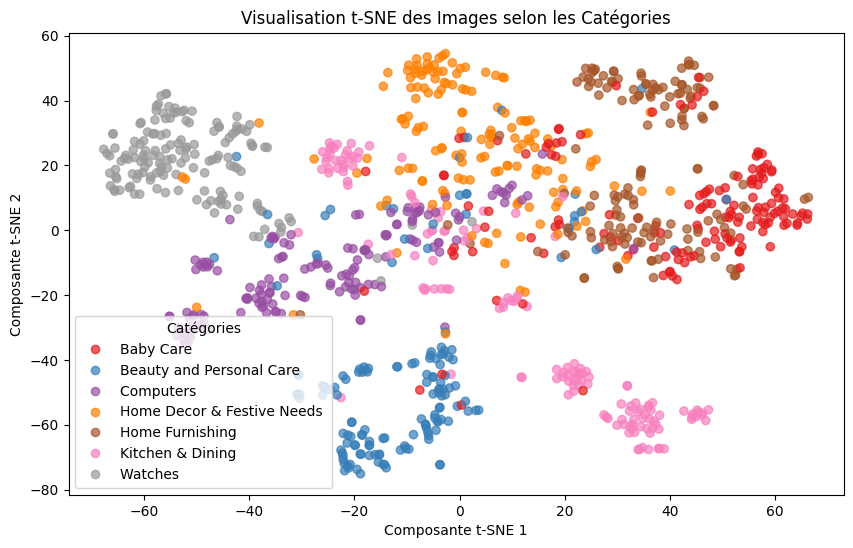

In [ ]:
# Initialiser t-SNE avec une perplexité réduite, par exemple 10
tsne = TSNE(n_components=2, n_iter=2000, init='random', random_state=42, perplexity=10)

# Appliquer t-SNE uniquement aux colonnes BoVW (numériques) en excluant les colonnes de type string
X_tsne = tsne.fit_transform(data_bovw.iloc[:, 1:-2].select_dtypes(include=[np.number]))

# Afficher le résultat
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_bovw['category_encoded'], cmap='Set1', alpha=0.7)

# Légende et affichage
handles, labels = scatter.legend_elements()
plt.legend(handles, labelencoder.classes_, title="Catégories")
plt.title("Visualisation t-SNE des Images selon les Catégories")
plt.xlabel("Composante t-SNE 1")
plt.ylabel("Composante t-SNE 2")
plt.show()

* L'analyse graphique montre clairement qu'il est possible de séparer automatiquement les images en fonction de leurs classes

* Cela a démontré la faisabilité de mettre en place une classification supervisée pour identifier automatiquement les classes des images.

L'Adjusted Rand Index (ARI) entre les catégories initiales et les clusters est de : 0.45205432450719435


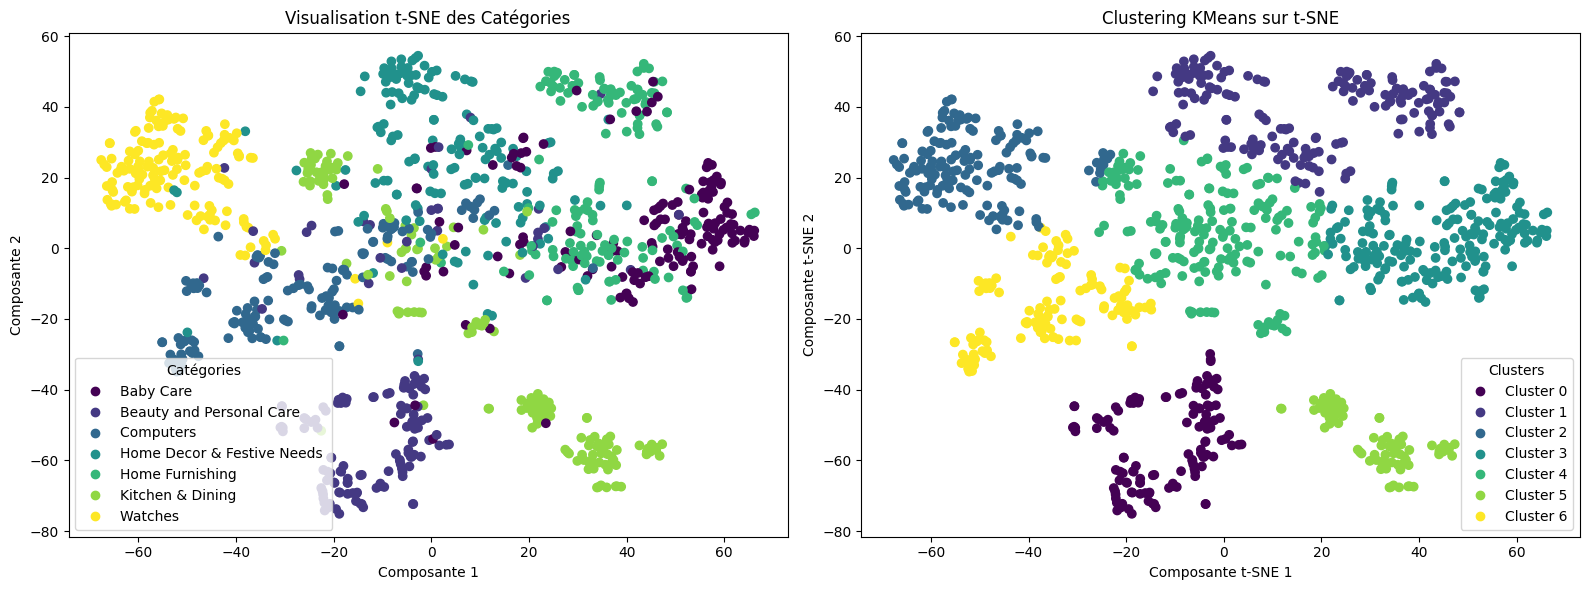

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Appliquer KMeans sur les données t-SNE
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)
categorie = labelencoder.fit_transform(data_texte['Category_1'])

# Créer une figure avec 2 sous-graphiques côte à côte
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1ère visualisation : t-SNE avec les catégories d'origine
scatter_1 = ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=categorie, cmap='viridis')
ax[0].set_title('Visualisation t-SNE des Catégories')
ax[0].set_xlabel('Composante 1')
ax[0].set_ylabel('Composante 2')
# Ajouter une légende pour les catégories d'origine
handles_1, labels_1 = scatter_1.legend_elements()
ax[0].legend(handles_1, labelencoder.classes_, title="Catégories")

# 2ème visualisation : Clustering KMeans sur t-SNE
scatter_2 = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
ax[1].set_title('Clustering KMeans sur t-SNE')
ax[1].set_xlabel('Composante t-SNE 1')
ax[1].set_ylabel('Composante t-SNE 2')
# Ajouter une légende pour les clusters
handles_2, labels_2 = scatter_2.legend_elements()
ax[1].legend(handles_2, [f'Cluster {i}' for i in range(7)], title="Clusters")

# Calculer l'ARI entre les étiquettes d'origine (categorie) et les clusters KMeans
ari = adjusted_rand_score(categorie, kmeans_labels)
print(f"L'Adjusted Rand Index (ARI) entre les catégories initiales et les clusters est de : {ari}")

# Afficher les deux graphiques côte à côte
plt.tight_layout()
plt.show()